In [1]:
import math
import scipy.stats as stats
import numpy as np

def refined_normal_poisson(k, lam):
    z = (k - lam) / math.sqrt(lam)
    skewness = 1 / math.sqrt(lam)
    phi_z = stats.norm.pdf(z)
    correction = 1 + (skewness / 6) * (z**3 - 3*z)
    return phi_z * correction

def refined_gamma_poisson(k, lam):
    shape = lam * (1 + 0.5 * lam**-0.5)
    scale = 1 - 0.25 * lam**-1
    return stats.gamma.pdf(k, a=shape, scale=scale)

def hybrid_poisson_approx(k, lam):
    w = 1 / (1 + math.exp(-2 * (lam - 15)))
    normal_val = refined_normal_poisson(k, lam)
    gamma_val = refined_gamma_poisson(k, lam)
    return w * normal_val + (1 - w) * gamma_val


In [2]:
lam = 10
k = 12
print(f"Approximate P(X={k}) with λ={lam}: {hybrid_poisson_approx(k, lam):.6f}")


Approximate P(X=12) with λ=10: 0.109904


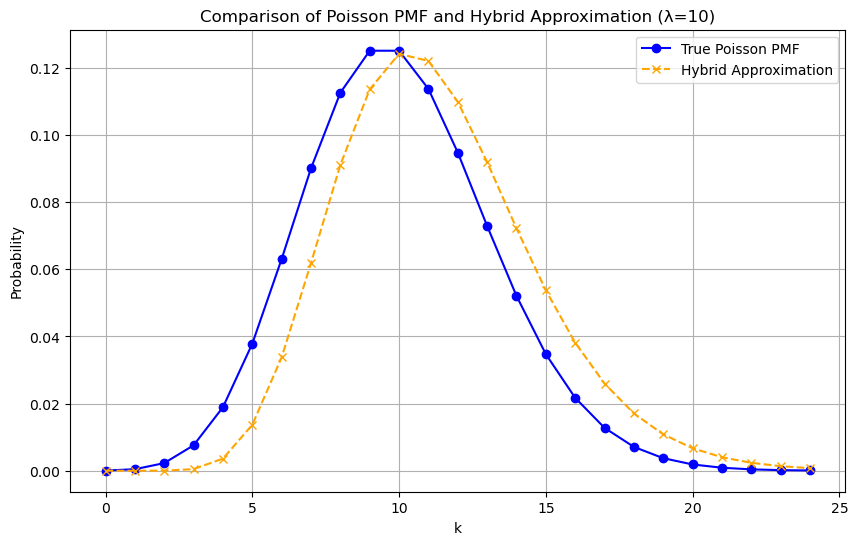

In [3]:
import matplotlib.pyplot as plt

# Range of k values around lambda
k_values = np.arange(0, 25)
true_probs = stats.poisson.pmf(k_values, mu=lam)
approx_probs = [hybrid_poisson_approx(k, lam) for k in k_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, true_probs, 'o-', label='True Poisson PMF', color='blue')
plt.plot(k_values, approx_probs, 'x--', label='Hybrid Approximation', color='orange')
plt.title(f"Comparison of Poisson PMF and Hybrid Approximation (λ={lam})")
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()
